In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [4]:
face_detector_path = "./haarcascade_frontalface_default.xml"

In [10]:
img = cv2.imread("./Fam.jpg")

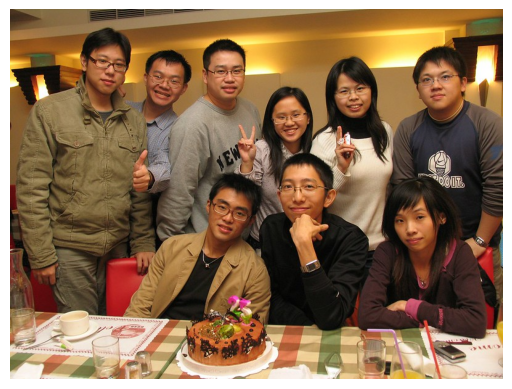

In [11]:
plt.axis('off')
plt.imshow(img[:,:,::-1])



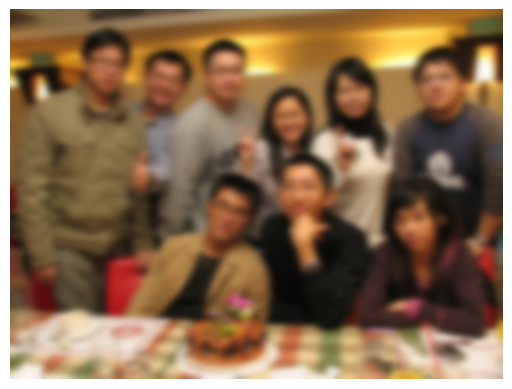

In [12]:
base_img = img.copy()


     

def blur_img(img, factor = 20):

    kW = int(img.shape[1] / factor)
    kH = int(img.shape[0] / factor)

    #ensure the shape of the kernel is odd
    if kW % 2 == 0: kW = kW - 1
    if kH % 2 == 0: kH = kH - 1
    
    blurred_img = cv2.GaussianBlur(img, (kW, kH), 0)
    return blurred_img


     

blurred_img = blur_img(img, factor = 20)
plt.axis('off')
plt.imshow(blurred_img[:,:,::-1])

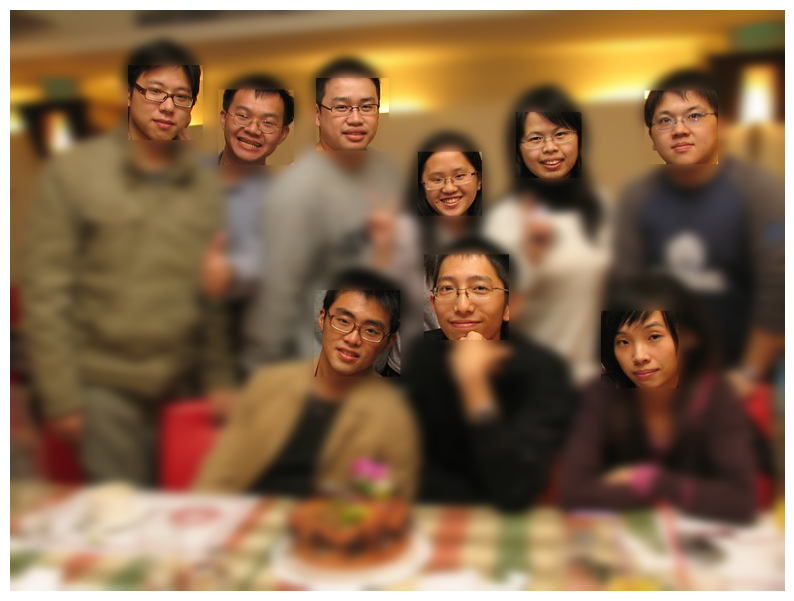

In [13]:
face_detector = cv2.CascadeClassifier(face_detector_path)


     

faces = face_detector.detectMultiScale(img, 1.3, 5)


     

for x, y, w, h in faces:
    detected_face = img[int(y):int(y+h), int(x):int(x+w)]
    detected_face_blurred = blur_img(detected_face, factor = 3)
    
    #plt.imshow(detected_face[:,:,::-1])
    
    blurred_img[y:y+h, x:x+w] = detected_face
    base_img[y:y+h, x:x+w] = detected_face_blurred


     

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(blurred_img[:,:,::-1])

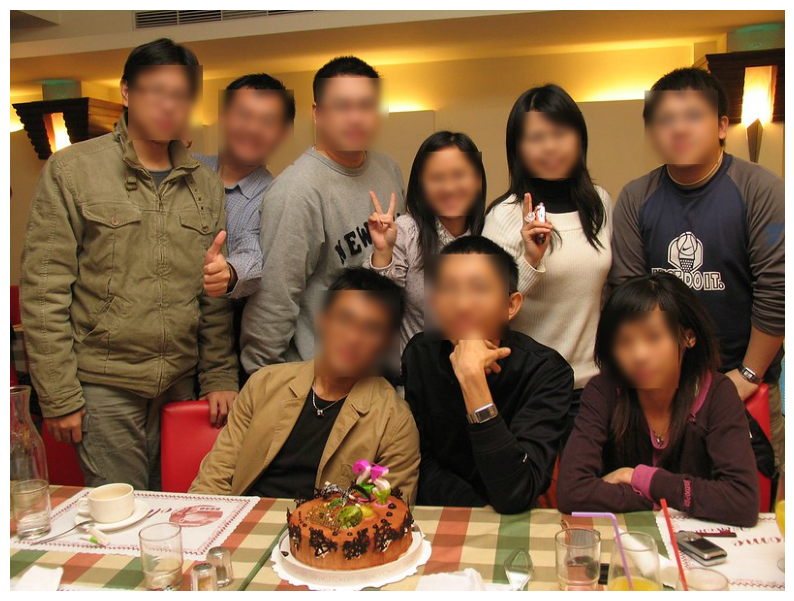

In [14]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(base_img[:,:,::-1])


     

Number of faces detected: 9


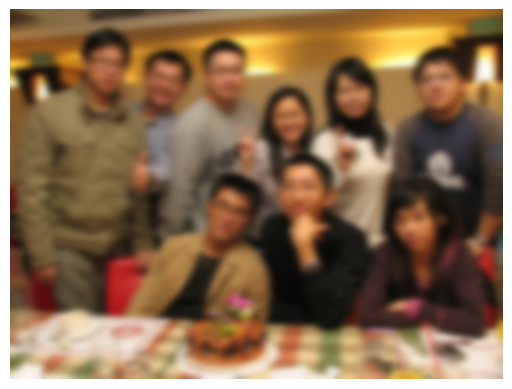

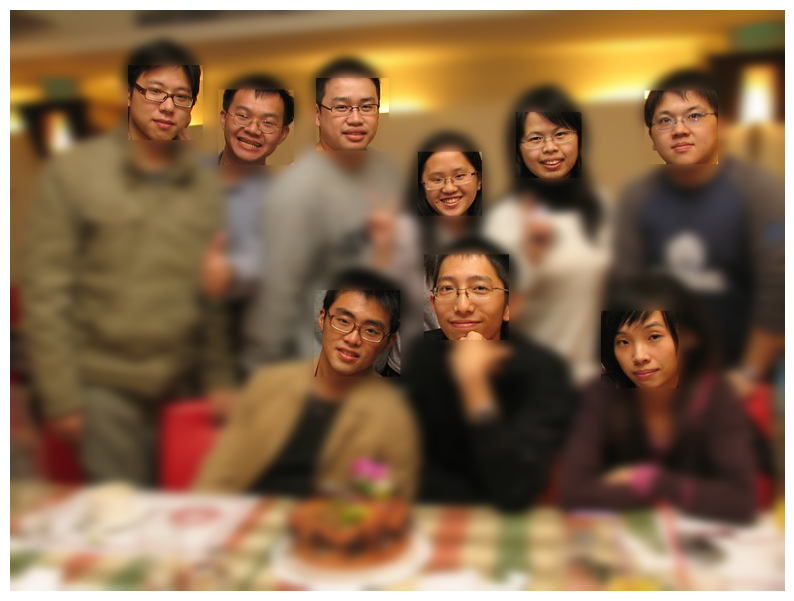

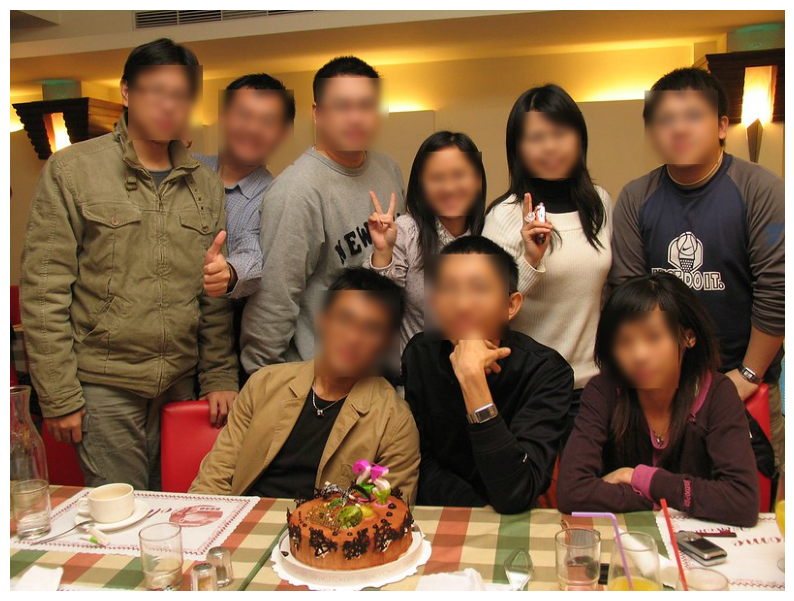

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
face_detector_path = "./haarcascade_frontalface_default.xml"
img = cv2.imread("./Fam.jpg")
plt.axis('off')
plt.imshow(img[:,:,::-1])
base_img = img.copy()

def blur_img(img, factor = 20):

    kW = int(img.shape[1] / factor)
    kH = int(img.shape[0] / factor)

    #ensure the shape of the kernel is odd
    if kW % 2 == 0: kW = kW - 1
    if kH % 2 == 0: kH = kH - 1
    
    blurred_img = cv2.GaussianBlur(img, (kW, kH), 0)
    return blurred_img

blurred_img = blur_img(img, factor = 20)
plt.axis('off')
plt.imshow(blurred_img[:,:,::-1])

face_detector = cv2.CascadeClassifier(face_detector_path)

faces = face_detector.detectMultiScale(img, 1.3, 5)
print("Number of faces detected: " + str(len(faces)))

for x, y, w, h in faces:
    detected_face = img[int(y):int(y+h), int(x):int(x+w)]
    detected_face_blurred = blur_img(detected_face, factor = 3)
    
    #plt.imshow(detected_face[:,:,::-1])
    
    blurred_img[y:y+h, x:x+w] = detected_face
    base_img[y:y+h, x:x+w] = detected_face_blurred

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(blurred_img[:,:,::-1])

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(base_img[:,:,::-1])